In [53]:
# IMPORT DES LIBRAIRIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as st
import re

## READ FILE

In [54]:
df = pd.read_excel("./4 - Salaries_Data.xlsx")

## CLONING DATA

In [55]:
data = df

## DATA TYPES

In [56]:
# WHAT ARE THE DIFFERENT TYPES OF DATA IN OUR DATAFRAME :
display(data.dtypes.to_frame())

,0
timestamp,object
company,object
level,object
title,object
totalyearlycompensation,float64
location,object
yearsofexperience,float64
yearsatcompany,float64
tag,object
basesalary,float64


## COLUMNS OPERATIONS


### CREATING NEW COLUMNS FROM PREVIOUS ONES

In [57]:
# CREATING NEW COMPANY & TITLE COLUMN : to add new company column and delete the existing one

data['company_name'] = data['company'].str.upper()
data['title_new'] = data["title"].str.replace(r'Soft Engineer', 'Software Engineer', regex=True)

# CREATING NEW COUNTRY & FILL MISSING VALUES WITH USA

data["country"] = data["location"].str.split(',').str[2]
data[['country']] = data[['country']].fillna('USA')


data.head(2)

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,company_name,title_new,country
0,7/2/2019 16:43:16,Intel,Grade 7,Hardware Engineer,200000.0,"Santa Clara, CA",14.0,3.0,Physical Design,163000.0,...,1.0,0.0,0.0,0.0,0.0,Asian,NaN,INTEL,Hardware Engineer,USA
1,10/13/2019 11:43:20,Latch,Manager,Software Engineering Manager,170000.0,"New York, NY",6.0,2.0,Full Stack,170000.0,...,1.0,0.0,0.0,0.0,0.0,Asian,NaN,LATCH,Software Engineering Manager,USA


### DROPPING COLUMNS WE DON'T WANT

In [58]:
# DROPPING IRRELEVANT COLUMNS OR COLUMNS WE ARE NOT USING :

dropped_data = data.drop(["title", "timestamp", "company", "Race_Asian", "Race_White", "Race_Two_Or_More","Race_Black","Race_Hispanic",
                          "Masters_Degree", "Bachelors_Degree", "Doctorate_Degree", "Highschool", "Some_College", "level"], axis=1)

dropped_data.head(2)

,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber,Race,Education,company_name,title_new,country
0,200000.0,"Santa Clara, CA",14.0,3.0,Physical Design,163000.0,10000.0,27000.0,Female,Asian,7434,807.0,11381,Asian,NaN,INTEL,Hardware Engineer,USA
1,170000.0,"New York, NY",6.0,2.0,Full Stack,170000.0,0.0,0.0,Male,Asian,10182,501.0,16214,Asian,NaN,LATCH,Software Engineering Manager,USA


### RENAMING COLUMNS

In [59]:
# RENAMING COLUMN NAMES FOR MORE CLARITY : 

dropped_data.rename(columns = {'totalyearlycompensation': 'total_yearly_compensation', 'yearsofexperience': 'years_of_experience', 'yearsatcompany': 'years_at_company',
                       'basesalary': 'base_salary', 'stockgrantvalue': 'stock_grant_value', 'cityid': 'city_id','rowNumber': 'row_number', 'dmaid' : 'dma_id', 'Race' : 'race', 'Education' : 'education', 'title_new' : 'title', 'otherdetails' : 'other_details'}, inplace=True)


### REORDERING COLUMNS

In [72]:
# REORDERING OUR DATA FRAME COLUMNS TO MAKE IT MORE READABLE/EXPLOITABLE :

new_columns_order = ["row_number", "company_name", "country", "location", "city_id", "dma_id", "years_of_experience", "years_at_company", "title", "tag", "total_yearly_compensation", "base_salary", "stock_grant_value", "bonus",
                     "gender", "race", "education", "other_details"]
reordered_data = dropped_data[new_columns_order]

reordered_data.head(2)


,row_number,company_name,country,location,city_id,dma_id,years_of_experience,years_at_company,title,tag,total_yearly_compensation,base_salary,stock_grant_value,bonus,gender,race,education,other_details
0,11381,INTEL,USA,"Santa Clara, CA",7434,807.0,14.0,3.0,Hardware Engineer,Physical Design,200000.0,163000.0,10000.0,27000.0,Female,Asian,NaN,Asian
1,16214,LATCH,USA,"New York, NY",10182,501.0,6.0,2.0,Software Engineering Manager,Full Stack,170000.0,170000.0,0.0,0.0,Male,Asian,NaN,Asian


### LOCATING MISSING DATA

In [61]:
# # OÙ SONT LOCALISEES LES DONNEES MANQUANTES DANS NOTRE DATAFRAME ?

reordered_data.isnull().sum()

# salary_is_null = data.loc[data['base_salary'].isnull(),:]
# salary_is_null.head(10)


row_number                       0
company_name                     5
location                         3
city_id                          0
dma_id                           2
years_of_experience              0
years_at_company                 0
title                            3
tag                            854
total_yearly_compensation        3
base_salary                      1
stock_grant_value                3
bonus                            1
gender                       19540
race                         40215
education                    32272
other_details                22505
dtype: int64

## DROPPING MISSING DATA

### COLUMNS

In [62]:
# MISSING VALUES ARE LESS THAN 2% OF THE REMAINING RELEVANT DATA
# SO WE ARE DROPPING THE CORRESPONDING ROWS

cleaned_data1 = reordered_data.dropna(subset=['company_name'])
cleaned_data2 = cleaned_data1.dropna(subset=['location'])
cleaned_data3 = cleaned_data2.dropna(subset=['dma_id'])
cleaned_data4 = cleaned_data3.dropna(subset=['title'])
cleaned_data5 = cleaned_data4.dropna(subset=['tag'])
cleaned_data6 = cleaned_data5.dropna(subset=['total_yearly_compensation'])
cleaned_data7 = cleaned_data6.dropna(subset=['base_salary'])
cleaned_data8 = cleaned_data7.dropna(subset=['stock_grant_value'])
cleaned_data9 = cleaned_data8.dropna(subset=['bonus'])

data = cleaned_data9

data.isnull().sum()

row_number                       0
company_name                     0
location                         0
city_id                          0
dma_id                           0
years_of_experience              0
years_at_company                 0
title                            0
tag                              0
total_yearly_compensation        0
base_salary                      0
stock_grant_value                0
bonus                            0
gender                       19030
race                         39372
education                    31440
other_details                21792
dtype: int64

### ROWS

In [63]:
# DELETING ROWS THAT ARE UNEXPLOITABLE
print(len(data))

# COUNTRIES WHICH ARE NOT
indices_to_drop1 = data.loc[data['location'] == 'Tel Aviv, Israel'].index
data = data.drop(indices_to_drop1)
print(len(data))

# YEARS OF EXPERIENCE = 0
indices_to_drop2 = data.loc[data['years_of_experience'] == 0].index
data = data.drop(indices_to_drop2)
print(len(data))


data.head()

61778
61776
57238


,row_number,company_name,location,city_id,dma_id,years_of_experience,years_at_company,title,tag,total_yearly_compensation,base_salary,stock_grant_value,bonus,gender,race,education,other_details
0,11381,INTEL,"Santa Clara, CA",7434,807.0,14.0,3.0,Hardware Engineer,Physical Design,200000.0,163000.0,10000.0,27000.0,Female,Asian,NaN,Asian
1,16214,LATCH,"New York, NY",10182,501.0,6.0,2.0,Software Engineering Manager,Full Stack,170000.0,170000.0,0.0,0.0,Male,Asian,NaN,Asian
2,19450,INTUIT,"Mountain View, CA",7322,807.0,1.0,1.0,Software Engineer,Web Development (Front-End),134000.0,110000.0,13000.0,11000.0,Male,Asian,NaN,"hispanic, asian, lgbt"
3,21208,GOOGLE,"Sunnyvale, CA",7472,807.0,5.0,5.0,Software Engineer,Distributed Systems (Back-End),400000.0,210000.0,145000.0,45000.0,Male,Asian,PhD,Asian - PhD
4,22644,SPOTIFY,"New York, NY",10182,501.0,8.0,2.5,Software Engineer,Full Stack,210000.0,170000.0,40000.0,0.0,Male,Asian,NaN,ethnicity: south asian


### REPLACING TYPOS

In [64]:
# FROM "SOFT ENGINEER" TO "SOFTWARE ENGINEER"

data['title'] = data['title'].replace('Soft Engineer', 'Software Engineer')

print(data['title'].value_counts())

data_plots = data
data_nlargest = data

data.head()

Software Engineer               36717
Product Manager                  4421
Software Engineering Manager     3518
Data Scientist                   2383
Hardware Engineer                2089
Product Designer                 1482
Technical Program Manager        1371
Solution Architect               1127
Management Consultant             906
Business Analyst                  818
Marketing                         700
Sales                             457
Recruiter                         449
Mechanical Engineer               445
Human Resources                   355
Name: title, dtype: int64


,row_number,company_name,location,city_id,dma_id,years_of_experience,years_at_company,title,tag,total_yearly_compensation,base_salary,stock_grant_value,bonus,gender,race,education,other_details
0,11381,INTEL,"Santa Clara, CA",7434,807.0,14.0,3.0,Hardware Engineer,Physical Design,200000.0,163000.0,10000.0,27000.0,Female,Asian,NaN,Asian
1,16214,LATCH,"New York, NY",10182,501.0,6.0,2.0,Software Engineering Manager,Full Stack,170000.0,170000.0,0.0,0.0,Male,Asian,NaN,Asian
2,19450,INTUIT,"Mountain View, CA",7322,807.0,1.0,1.0,Software Engineer,Web Development (Front-End),134000.0,110000.0,13000.0,11000.0,Male,Asian,NaN,"hispanic, asian, lgbt"
3,21208,GOOGLE,"Sunnyvale, CA",7472,807.0,5.0,5.0,Software Engineer,Distributed Systems (Back-End),400000.0,210000.0,145000.0,45000.0,Male,Asian,PhD,Asian - PhD
4,22644,SPOTIFY,"New York, NY",10182,501.0,8.0,2.5,Software Engineer,Full Stack,210000.0,170000.0,40000.0,0.0,Male,Asian,NaN,ethnicity: south asian


## DEALING WITH OUTLIERS

### METHOD 1 : TINKERING AROUND

In [65]:
# YEARS OF EXPERIENCE
q = data["years_of_experience"].quantile(0.99997)
p = data["years_at_company"].quantile(0.99997)
data = data[data["years_of_experience"] < q]
data = data[data["years_at_company"] < p]
data

# YEARLY COMPENSATION
a = data["total_yearly_compensation"].quantile(0.99994)
data = data[data["total_yearly_compensation"] < a]
b = data["base_salary"].quantile(0.99997)
data = data[data["base_salary"] < b]

# YEARLY BONUS
c = data["bonus"].quantile(0.99997)
data = data[data["bonus"] < c]

### METHOD 2 : TRYING TO IDENTIFY THEM BY VISUALIZATION

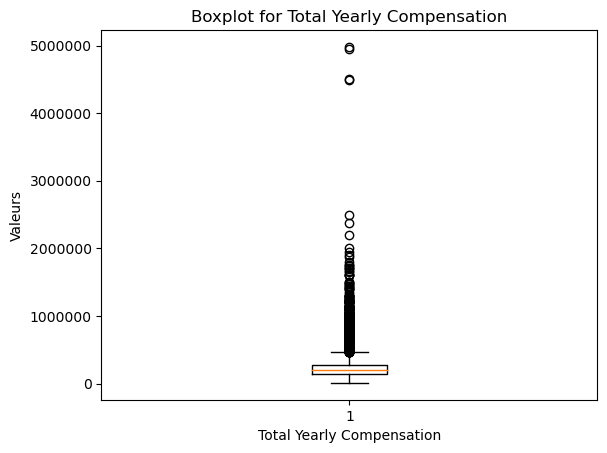

In [66]:
plt.boxplot(data_plots['total_yearly_compensation'])

plt.title('Boxplot for Total Yearly Compensation')
plt.xlabel('Total Yearly Compensation')
plt.ylabel('Valeurs')
plt.ticklabel_format(style='plain', axis='y')


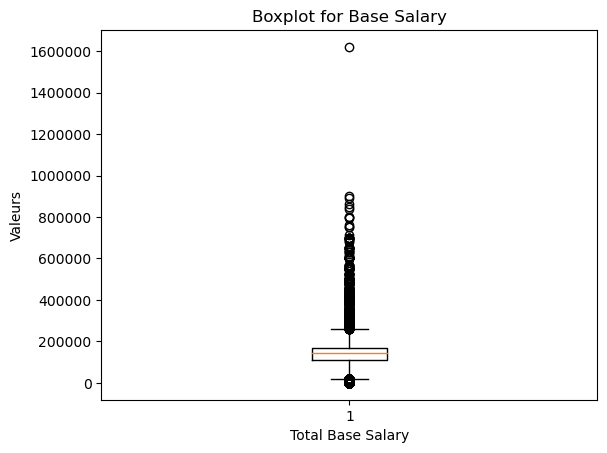

In [67]:
plt.boxplot(data_plots['base_salary'])

plt.title('Boxplot for Base Salary')
plt.xlabel('Total Base Salary')
plt.ylabel('Valeurs')
plt.ticklabel_format(style='plain', axis='y')

### METHOD 3 : LEARNING ABOUT .nlargest()

In [68]:
display(data["total_yearly_compensation"].nlargest(5))
display(data["years_of_experience"].nlargest(5))
display(data["years_at_company"].nlargest(5))
display(data["bonus"].nlargest(5))


53142    2500000.0
12461    2372000.0
53152    2200000.0
53145    2000000.0
53147    1950000.0
Name: total_yearly_compensation, dtype: float64

23104    42.0
23204    42.0
24551    41.0
24608    41.0
12370    40.0
Name: years_of_experience, dtype: float64

21118    34.0
48524    34.0
48243    33.0
53077    33.0
36220    32.0
Name: years_at_company, dtype: float64

21425    630000.0
12819    555000.0
54031    555000.0
19850    550000.0
33716    550000.0
Name: bonus, dtype: float64

In [80]:
missing_values_sum = data['total_yearly_compensation'].isnull().sum()
missing_values = data['total_yearly_compensation'].isnull()

display("Number of missing value is : ", missing_values_sum)
display(missing_values)

'Number of missing value is : '

0

0        False
1        False
2        False
3        False
4        False
         ...  
62636    False
62638    False
62639    False
62640    False
62641    False
Name: total_yearly_compensation, Length: 57227, dtype: bool

In [81]:
average_yearly_compensation = {
    "Business_Analyst": 103505.08,
    "Data_Scientist": 138054.69,
    "Hardware_Engineer": 139628.18,
    "Human_Resources": 128590.66,
    "Management Consultant": 136195.7,
    "Marketing": 140957.75,
    "Mechanical_Engineer": 118455.1,
    "Product_Designer": 137188.12,
    "Product_Manager": 148230.71,
    "Recruiter": 117496.67,
    "Sales": 118470.72,
    "Software_Engineer": 132367.29,
    "Software_Engineering_Manager": 174007.22,
    "Solution Architect": 140173.51,
    "Technical Program Manager": 156454.74,
}

# WHERE ARE THE MISSING VALUES
missing_values = data["total_yearly_compensation"].isnull()

# REPLACE MISSING VALUES IN TOTAL_YEARLY_COMPENSATION TITLE WITH AN AVERAGE OF THE SALARY BASED ON A PERSON'S POSITION "TITLE"
for index, row in data[missing_values].iterrows():
    title = row["title"]
    mean_salary = average_yearly_compensation.get(title)
    if mean_salary is not None:
        data.loc[index, "total_yearly_compensation"] = mean_salary

# CHECKING IF IT WENT WELL
print("The number of remaining yearly_compensation is :", data["total_yearly_compensation"].isnull().sum())


The number of remaining yearly_compensation is : 0


## EXPORTING CLEAN DATA AS .CSV

In [82]:
data.to_csv("New_Salaries_Data.csv", sep = ";", index = False)